<h1>Cuadernillo de apoyo (estabilidad) de la charla: caos, estabilidad y catástrofe de la XI Jornada de las Matemáticas Universidad Distrital presentado por Arturo Sanjuán.</h1>

Primero llamemos algunas librerías

In [1]:
from sympy import *
from sympy.plotting import plot_parametric, plot3d
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets.widgets import *
from ipywidgets import IntSlider, Label
from IPython.display import HTML
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay, glob
from PIL import Image
from numba import jit
%matplotlib inline
init_printing()

Un video de reproducción de las bacterias

In [2]:
HTML('<img src="coli-growth.gif" style="width: 400px">')

La siguiente interacción muestra la bifurcación de $N'=rN$ en $r=0$

In [14]:
@jit(nopython=True)
def sol(N0, r, t):
    return N0*np.exp(r*t)

In [15]:
def plot_malthus_stream(r):
    t = np.linspace(0,4,30)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_xlim([0,4])
    ax.set_ylim([-10,10])
    ax.set_xlabel(r"$t$", fontsize = 20)
    ax.set_ylabel(r"$N$", fontsize = 20)
    for i in np.linspace(-10,10):
        plt.plot(t, sol(i, r, t), color = 'blue')
    plt.plot(t, np.zeros(len(t)), color = 'red')

In [16]:
interact(plot_malthus_stream, r = FloatSlider(min=-3,max=3,step=0.1,value=-3, description = r'$r$'))

interactive(children=(FloatSlider(value=-3.0, description='$r$', max=3.0, min=-3.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_malthus_stream>

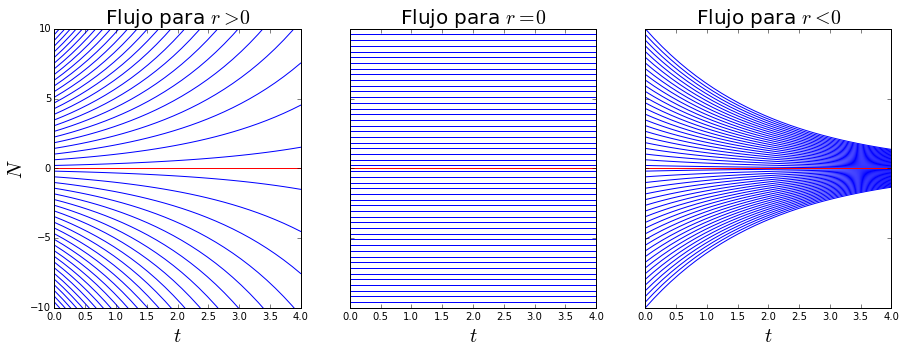

In [6]:
t = np.linspace(0,4,30)
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (15,5), ncols=3, sharex=True, sharey = True)
ax1.set_xlim([0,4])
ax1.set_ylim([-10,10])
ax2.set_xlim([0,4])
ax2.set_ylim([-10,10])
ax3.set_xlim([0,4])
ax3.set_ylim([-10,10])
for i in np.linspace(-10,10):
    ax1.plot(t, sol(i, 0.5, t), color = 'blue')
ax1.plot(t, np.zeros(len(t)) , color = 'red')
for i in np.linspace(-10,10):
    ax2.plot(t, sol(i, 0, t), color = 'blue')
ax2.plot(t, np.zeros(len(t)), color = 'red')
for i in np.linspace(-10,10):
    ax3.plot(t, sol(i, -0.5, t), color = 'blue')
ax3.plot(t, np.zeros(len(t)) , color = 'red')
ax1.set_xlabel(r"$t$", fontsize = 20)
ax2.set_xlabel(r"$t$", fontsize = 20)
ax3.set_xlabel(r"$t$", fontsize = 20)
ax1.set_ylabel(r"$N$", fontsize = 20)
ax1.set_title(r"Flujo para $r>0$", fontsize = 20)
ax2.set_title(r"Flujo para $r=0$", fontsize = 20)
ax3.set_title(r"Flujo para $r<0$", fontsize = 20)
plt.savefig('malthus1.pdf')

El siguiente es el diagrama de bifurcación de $u'=u(1-u)-c$

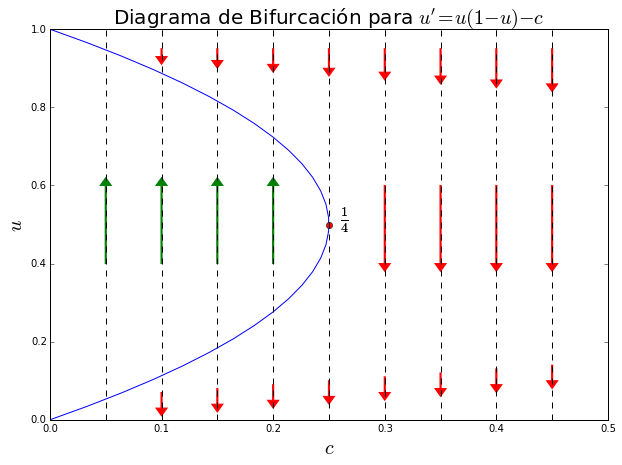

In [7]:
t = np.linspace(0,1,30)
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
ax.set_xlim([0,0.5])
ax.set_ylim([0,1])
plt.plot(-t**2+t, t, color = 'blue')
plt.plot(0.25,0.5, 'ro')
for i in np.arange(0,1,0.05):
    plt.plot(np.zeros(30) + i, t, linestyle = "--", color = "black")
for i in np.arange(0.05,0.2,0.05):
    ax.arrow(i, 0.4, 0, 0.2, head_width=0.01, head_length=0.02, fc='green', ec='green')
for i in np.arange(0.3,0.45,0.05):
    ax.arrow(i, 0.6, 0, -0.2, head_width=0.01, head_length=0.02, fc='red', ec='red')
for i in np.arange(0.1,0.5,0.05):
    ax.arrow(i, 0.95, 0, -i/5, head_width=0.01, head_length=0.02, fc='red', ec='red')
for i in np.arange(0.1,0.5,0.05):
    ax.arrow(i, 0.05 + i/5, 0, -0.04, head_width=0.01, head_length=0.02, fc='red', ec='red')
ax.annotate(r"$\frac{1}{4}$", xy = (0.26, 0.5), fontsize = 20)
ax.annotate(r"$\frac{1}{4}$", xy = (0.26, 0.5), fontsize = 20)
ax.set_xlabel(r"$c$", fontsize = 20)
ax.set_ylabel(r"$u$", fontsize = 20)
ax.set_title(r"Diagrama de Bifurcación para $u'=u(1-u)-c$", fontsize = 20)
plt.savefig('bifurcationdiagram1.pdf')

Ahora una interacción del flujo

In [17]:
def raiz(c,pm):
    if pm == 1:
        return (1+np.sqrt(1-4*c))*0.5
    if pm == -1:
        return (1-np.sqrt(1-4*c))*0.5

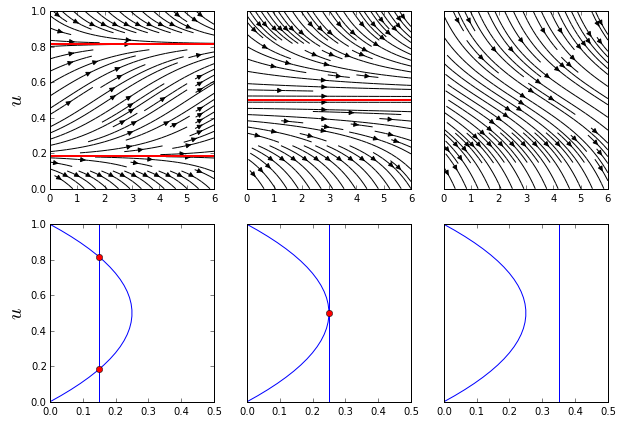

In [19]:
t = np.linspace(0,1,30)
Y, X = np.mgrid[0:1:100j, 0:6:100j]
V = Y*(1-Y) - 0.15
U = 1 + 0*X
speed = np.sqrt(1 + V*V)
fig = plt.figure(1, figsize = (10,7))
#plt.title(r'Diagramas de flujo y de bifurcación', fontsize = 20)
ax1 = fig.add_subplot(231)
plt.streamplot(X, Y, U, V, color=U, linewidth=1, cmap=plt.cm.bone)
plt.plot([0,6],[raiz(0.15,-1),raiz(0.15,-1)], color= 'red', linewidth = 2)
plt.plot([0,6],[raiz(0.15,1),raiz(0.15,1)], color= 'red', linewidth = 2)
ax1.set_ylabel(r'$u$', fontsize = 20)

ax2 = fig.add_subplot(232)
V = Y*(1-Y) - 0.25
plt.yticks([])
plt.streamplot(X, Y, U, V, color=U, linewidth=1, cmap=plt.cm.bone)
plt.plot([0,6],[0.5,0.5], color= 'red', linewidth = 2)

ax3 = fig.add_subplot(233)
plt.yticks([])
V = Y*(1-Y) - 0.35
plt.streamplot(X, Y, U, V, color=U, linewidth=1, cmap=plt.cm.bone)

ax4 =fig.add_subplot(234)
plt.plot(-t**2+t, t, color = 'blue')
plt.plot([0.15,0.15],[0,1], color = 'blue')
plt.plot(0.15, raiz(0.15,-1), 'ro')
plt.plot(0.15, raiz(0.15,1), 'ro')
ax4.set_xlim([0,0.5])
ax4.set_ylabel(r'$u$', fontsize = 20)

ax5 = fig.add_subplot(235)
plt.plot(-t**2+t, t, color = 'blue')
plt.plot([0.25,0.25],[0,1], color = 'blue')
plt.plot(0.25, 0.5, 'ro')
ax5.set_xlim([0,0.5])
plt.yticks([])

ax6 = fig.add_subplot(236)
plt.plot(-t**2+t, t, color = 'blue')
plt.plot([0.35,0.35],[0,1], color = 'blue')
ax6.set_xlim([0,0.5])
plt.yticks([])

plt.savefig('bifurcationdiagram2.pdf')

In [20]:
t = np.linspace(0,1,30)
Y, X = np.mgrid[0:1:100j, 0:6:100j]
U = 1 + 0*X
speed = np.sqrt(1 + V*V)
def plot_flowbif(c):
    fig = plt.figure(1, figsize = (12,5))
    ax1 = fig.add_subplot(121)
    V = Y*(1-Y) - c
    plt.streamplot(X, Y, U, V, color=U, linewidth=1, cmap=plt.cm.bone)
    if c <= 0.25:
        plt.plot([0,6],[raiz(c,-1),raiz(c,-1)], color= 'red', linewidth = 3)
        plt.plot([0,6],[raiz(c,1),raiz(c,1)], color= 'red', linewidth = 3)
    ax1.set_ylabel(r'$u$', fontsize = 20)
    ax1.set_xlabel(r'$t$', fontsize = 20)

    ax1.set_xlim([0,6])
    ax1.set_ylim([0,1])
    ax1.set_title(r'Diagrama de fuljo', fontsize = 15)

    ax2 = fig.add_subplot(122)
    plt.plot(-t**2+t, t, color = 'blue')
    plt.plot([c,c],[0,1], color = 'blue')
    if c<=0.25:
        plt.plot(c, raiz(c,-1), 'ro')
        plt.plot(c, raiz(c,1), 'ro')
    plt.yticks([])
    ax2.set_xlim([0,0.5])
    ax2.set_xlabel(r'$c$', fontsize = 20)
    ax2.set_ylim([0,1])
    ax2.set_title(r'Diagrama de bifurcación', fontsize = 15)

In [21]:
interact(plot_flowbif, c = FloatSlider(min=0,max=1,step=0.05,value=0, description = r'$c$'))

interactive(children=(FloatSlider(value=0.0, description='$c$', max=1.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_flowbif>